In [13]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

In [26]:
duration = 5  # Продолжительность в секундах
sample_rate = 44100  # Частота дискретизации в Гц

In [6]:
def generate_white_noise(duration, sample_rate):
    num_samples = int(duration * sample_rate)
    white_noise = np.random.normal(0, 1, num_samples)
    return white_noise

In [7]:
white_noise = generate_white_noise(duration, sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

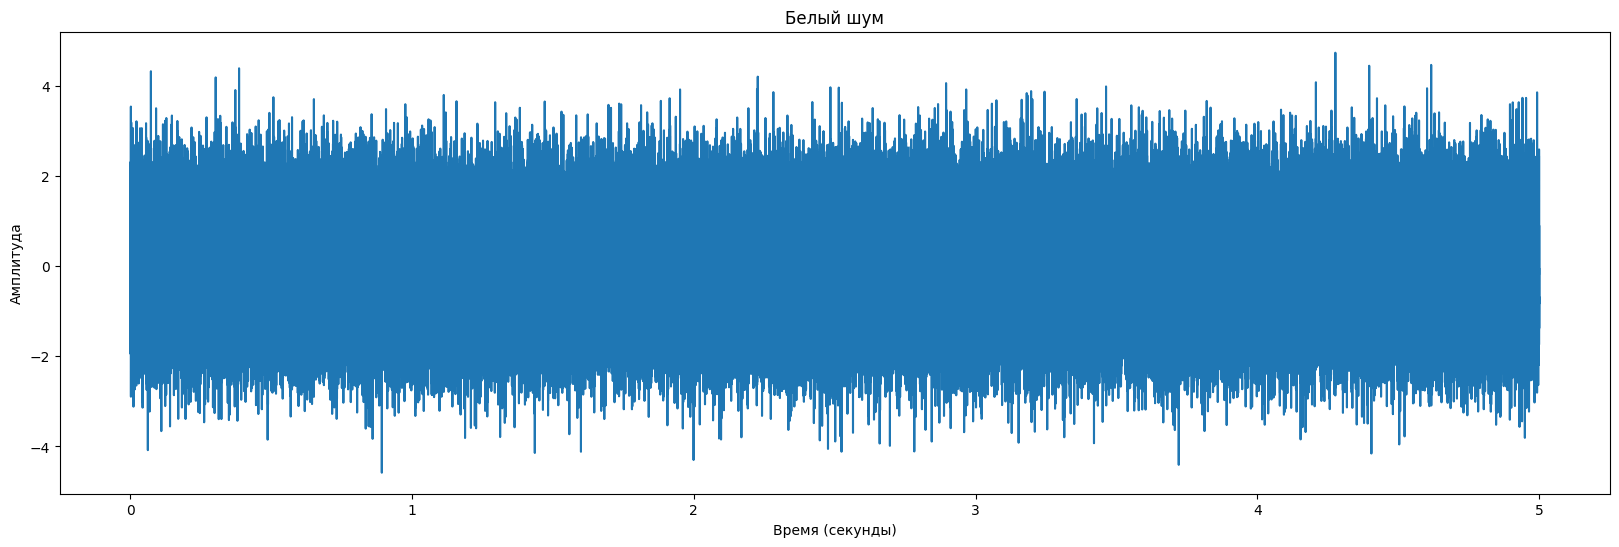

In [8]:
time_axis = np.linspace(0, duration, len(white_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, white_noise)
plt.title('Белый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show

In [9]:
def generate_pink_noise(duration, sample_rate = 1):
    white_noise_g = generate_white_noise(duration, sample_rate)
    
    pink_ft = np.fft.rfft(white_noise_g) # Преобр. Фурье белого шума
    pink_ft = pink_ft / np.sqrt(np.arange(1, len(pink_ft)+1)) # Деление на частоты

    return np.fft.irfft(pink_ft) # обратное преобразование

In [10]:
pink_noise = generate_pink_noise(duration, sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

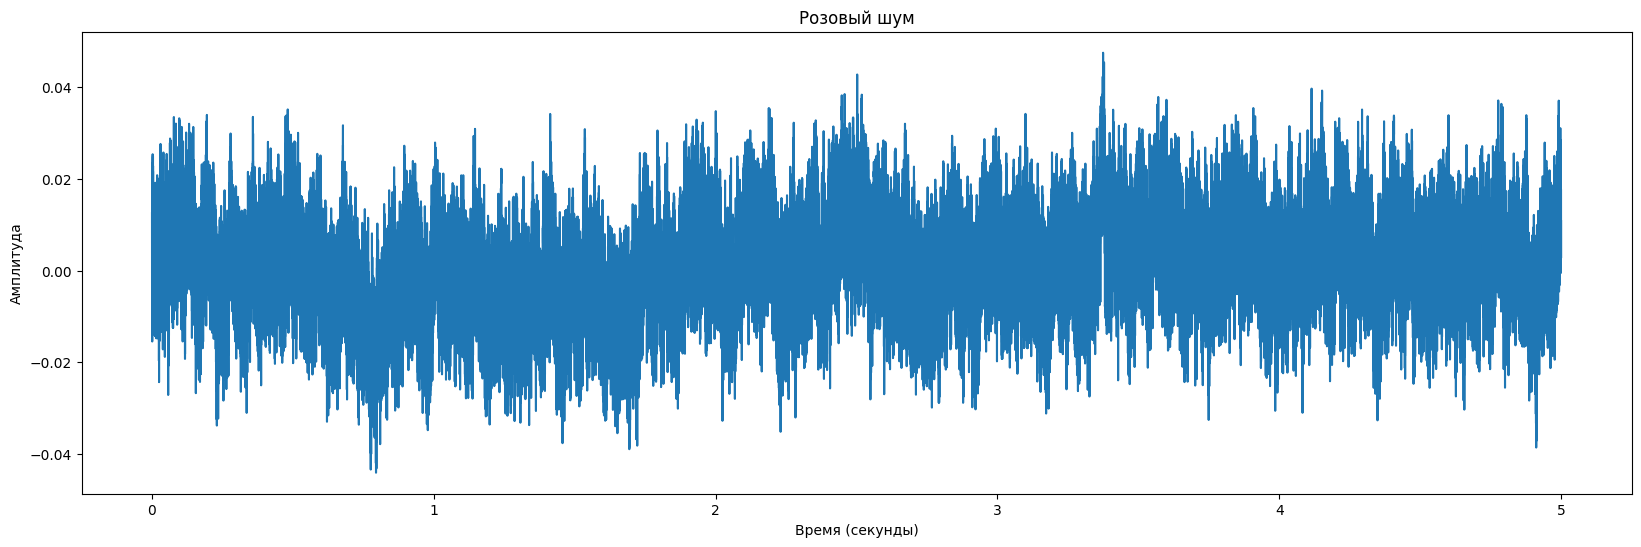

In [11]:
time_axis = np.linspace(0, duration, len(white_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, pink_noise)
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show

In [14]:
# количество элементов в записи сигнала
num_samples = int(duration * sample_rate)
freq1 = 20000
freq2 = 25000

# Частоты, на которых будем генерировать
num_frequencies = 100  # Количество случайных частот
frequencies = np.linspace(freq1, freq2, num_frequencies) # лист с частотами

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

amplitudes = np.random.normal(0, 1, num_frequencies)  # опять сгенерировали белый гауссовский шум
    
black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
    
for i in range(num_frequencies):
        black_noise += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time_axis)

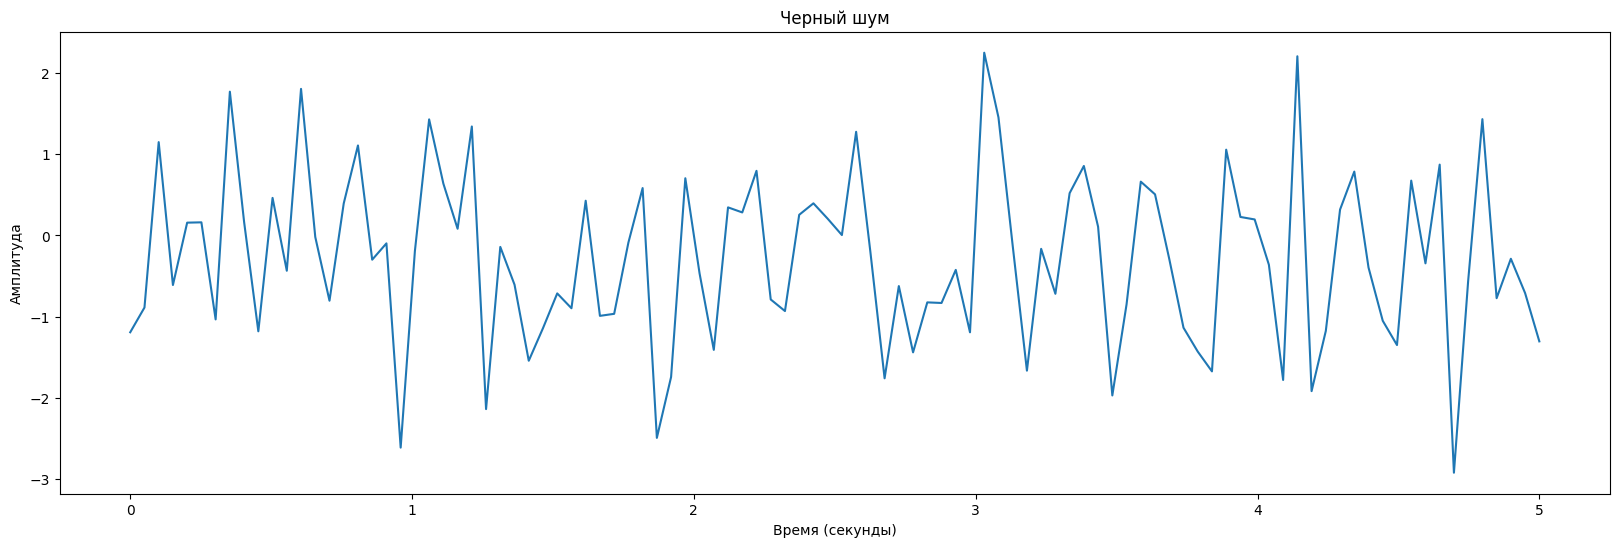

In [15]:
time_axis = np.linspace(0, duration, len(amplitudes))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, amplitudes)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

![Alt text](image-1.png)

In [19]:
kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

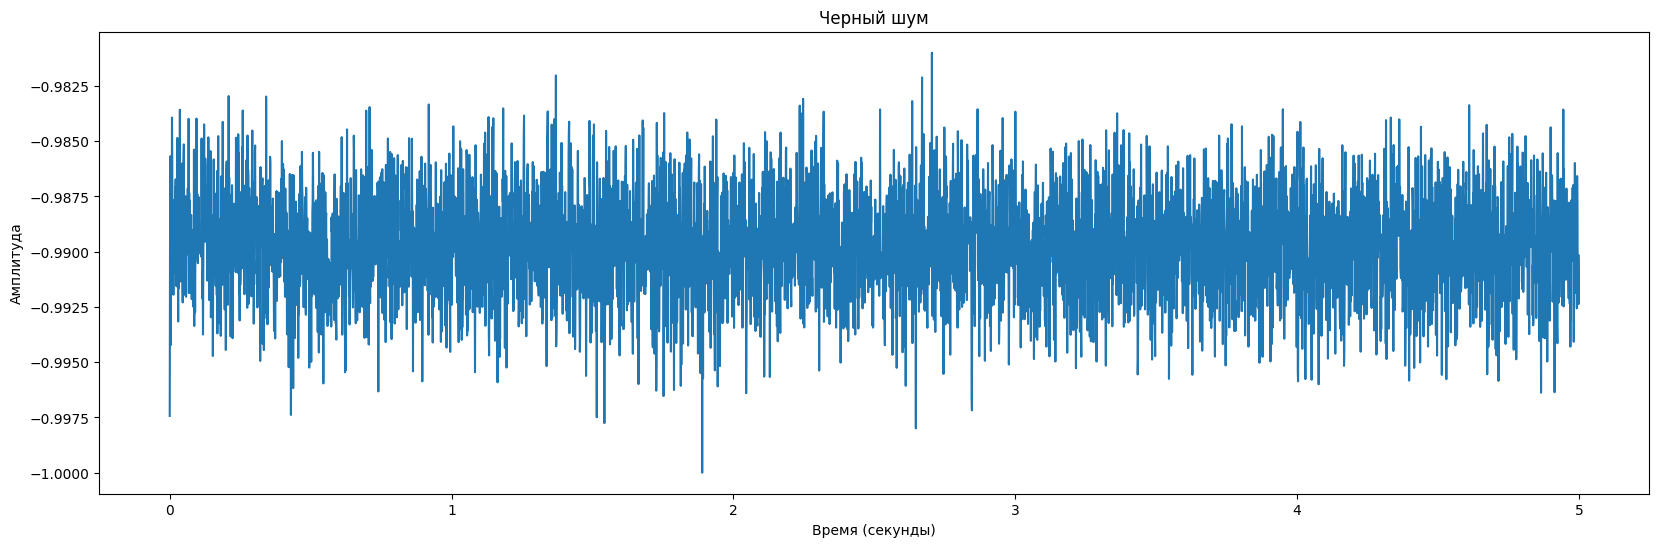

In [20]:
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [30]:
duration = 5
sample_rate = 44100

num_samples = int(duration * sample_rate)

time_points = np.linspace(0, duration, num_samples)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_start = generate_white_noise(duration, sample_rate)

values = np.sin(time_points * np.pi)**3 + np.cos(time_points * np.pi)**3 # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + white_noise_start # зашумляем сигнал

C:\Users\vegam\AppData\Local\Temp\ipykernel_5468\3911308997.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


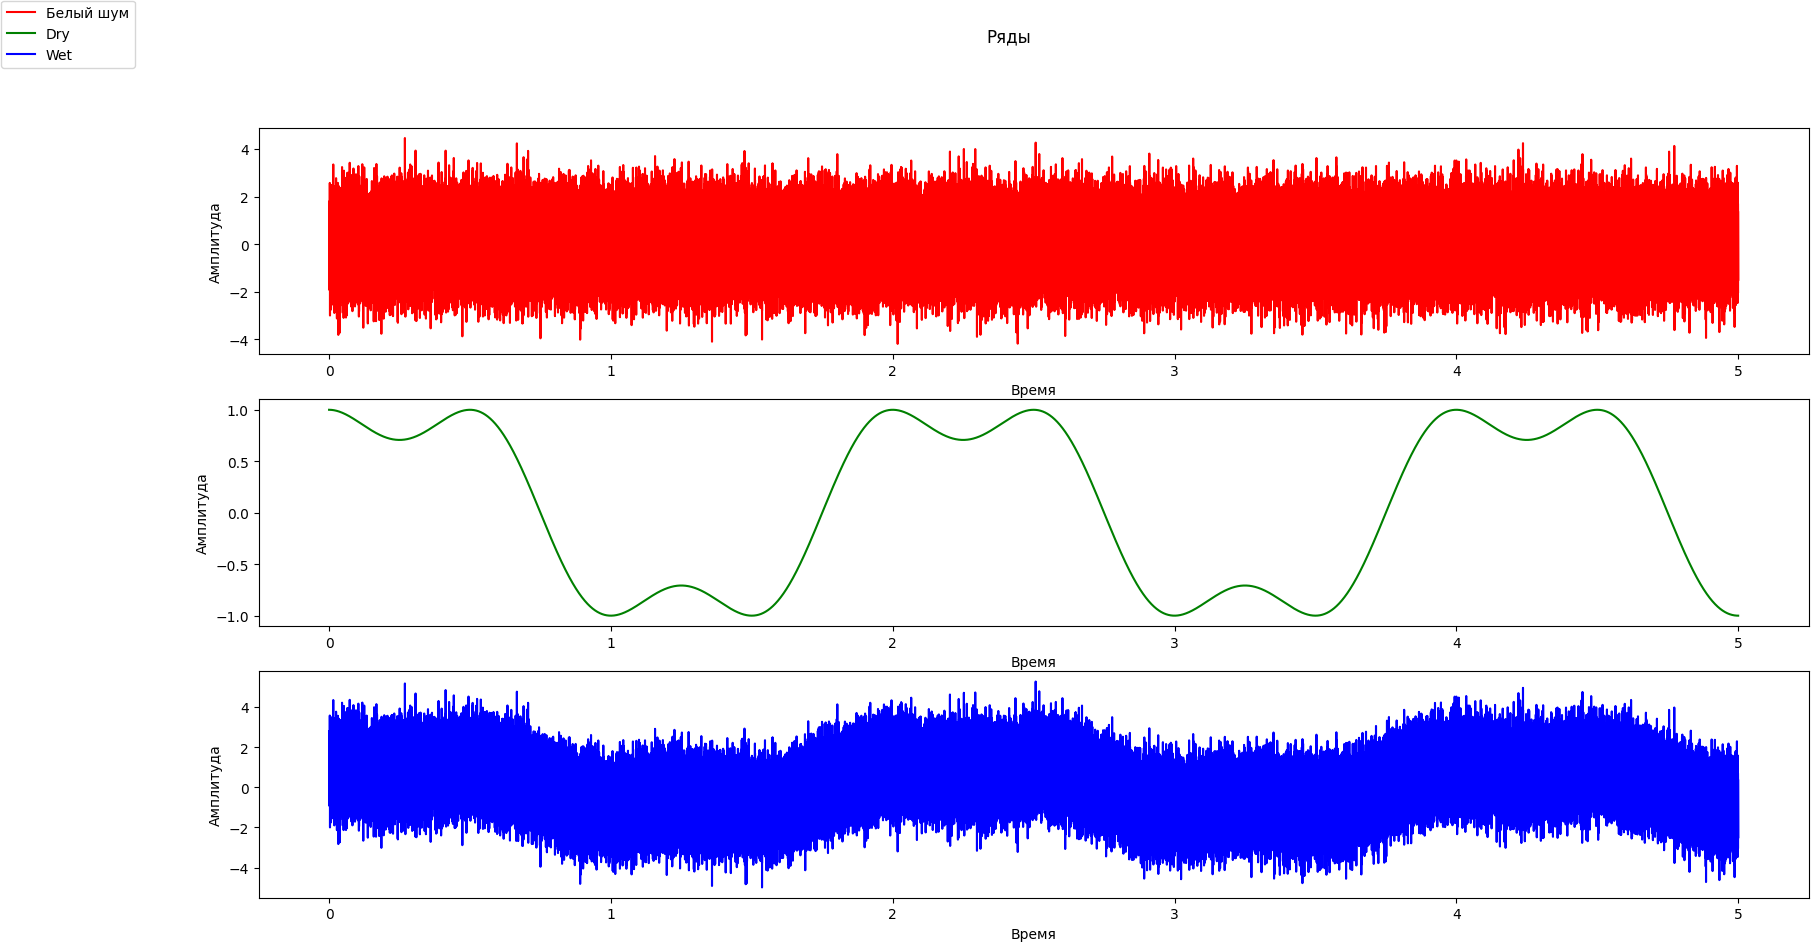

In [31]:
# 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))

# общий заголовок для всей картинки
fig.suptitle('Ряды')

labels = ["Белый шум", "Dry", "Wet"]


c0 = axs[0].plot(time_points, white_noise_start, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

c2 = axs[2].plot(time_points, values_noise, color="blue")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)